In [10]:
## first, we import all the nice things we're using for our plots and maths
## NOTE: if you have an questions/concerns with Python, just Google it! Most info is available online


import numpy as np                  ## to manipulate our values 
from scipy.integrate import quad    ## to integrate our curves
from scipy import interpolate       ## to match up some values to one another
import matplotlib.pyplot as plt     ## to plot our data; inline just puts the plots in Jupyter as opposed to opening a new window  
%matplotlib inline 

# Near IR Photometry and Dust Extinction
## Dr. Larson
## Grace Eliason
## 2018

-----
## Introduction and Goals

### _Some Background_

__Photometry__ refers to the study of an astronomical object's flux by means of broad-wavelength filters. In this study we will be using filters to examine not only luminuous objects but also the dust that surrounds them. Before we learn about dust, however, we must learn about flux and magnitude. 

The idealized brightness, or intensity, of a star plotted against wavelength is known as the __blackbody radiation curve__, or Planck's curve. The equation of this curve that we'll be using is  

$$ F_{\lambda}(T) = \frac{2\pi hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_BT}} - 1} $$

where $F_{\lambda}(T)$ is the temperature-dependent radiative flux density over a certain wavelength integral, $h$ is Planck's constant, $c$ is the speed of light, $\lambda$ is wavelength, $k_B$ is the Boltzmann constant, and $T$ is temperature. What is important to know is that the integral of this curve over an  wavelengths is the  __flux__, $F$, with units of Watts per meter squared: 

$$ F (T) = \int_{\Delta \lambda} F_{\lambda}(T) d\lambda $$

The curve for this function is plotted in Part 1. Note: the curve varies depending on the selected temperature. We choose this temperature based on the type of star we are observing. What we get from this is the flux of our star, which we can compare to the flux of our filter to find the the __apparent magnitude__ of our star. This stellar magnitude is defined as a star's apparent brightness, or its luminosity as compared to some base. The closer the magnitude is to 1, the brighter it seems. The naked eye can only see stars as dim as the 6th magnitude. The equation for our magnitude is 

$$ m = -2.5 \log \frac{F(T)}{F_{0}} $$

where $m$ is apparent magnitude, $F(T)$ is flux given by the Planck function, and $F_0$ is zeropoint flux given as a property of the filter. 

Unfortunately, this only gives us one data point on our star. The next step is to find the difference between adjacent-bandwidth magnitudes. Because magnitude is calculated logarithmically, the difference between magnitudes will give us something similar to a ratio. In practice, one would calcuate the magnitude through one bandwidth of filter, the magnitude through an adjacent bandwidth filter, then find the __magnitude difference__between the two. A useful metric that comes from this are __color-color ratios__ of adjacent passbands that tell us the apparent color of the star. 

The reason we use magnitude difference and not $m$ is because using magnitude difference eliminates the star's distance. The __absolute magnitude__ for an individual star is defined as 

$$ M = m - 2.5\log(d^2/10) $$

Where $m$ is the star's apparent magnitude and $d$ is the distance to the star. 
If we are looking at an individual star, we need not consider distance. To eliminate distance, we subtract the magnitude in one range from that of the adjacent range, let's say J and K: 

$  M_{JK} = (m_J - 2.5\log\frac{d^2}{10}) - (m_K - 2.5\log\frac{d^2}{10}) $

$ M_{JK}= m_J - m_K  $

$ M_{JK} = m_{JK} $

This brings me to dust extinction. __Dust extinction__ occurs when interstellar dust particles absorb and/or scatter light near a star, skewing our observed intensity at certain wavelengths. Another name for this phenomenon is __reddening__, thus named because extinction is often times greater in shorter wavelengths. We can calculate this using the metric: 

$ A = m_{afterdust} - m_{beforedust} $

$ A = (-2.5 \log \frac{F_{afterdust}(T)}{F_{0}}) - (-2.5 \log \frac{F_{beforedust}(T)}{F_{0}}) $

$ A = -2.5 \log (F_{afterdust}(T)) + 2.5 \log(F_{0}) + 2.5 \log (F_{beforedust}(T)) - 2.5 \log(F_{0}) $

$ A = -2.5 \log \frac{F_{afterdust}(T)}{F_{beforedust}(T)} $


### _This Experiment_

Many astronomers assume that extinction is uniform everywhere in the infrared bandpasses, considering it's of higher variance and impact in the ultraviolet. We are here to prove that this is not the case. 

The Larson research team has chosen to study dust extinction in the near infrared passbands. The long-term goal of project is to demonstrate the effect of background sources on photometric dust signatures in the near-infrared. The short-term goal of this project is to develop an original Jupyter notebook that can eventually be applied to modeled or real background sources. 

This specific portion of the project has been broken down into four parts: 

1) The Ideal Filter

2) The Real Filter

3) The Real Filter with Dust Extinction

4) Issues and Proposed Solutions

This separation will help in taking a step-by-step approach to the code, the theory, and the application of filter usage and dust extinction curves. 

**Note: All background sources considered in this specific file are ideal, i.e. the Planck function is used to represent their fluxes at certain temperatures**


-----
## Part 1: The Ideal Filter


This will be like looking at space and seeing ideal fluxes, or rather, looking at luminous objects that follow the __Planck blackbody radiation curve (or the Planck function)__ ideally. We will be looking at our objects through __filters__, otherwise known as the study of __photometry__. If we compare these fluxes to our zeropoint flux for each filter, we get a __magnitude__. This magnitude is defined as: 

$$ m = -2.5 \log \frac{F(T)}{F_{0}} $$

where $m$ is magnitude, $F_{\lambda}$ is flux given by the Planck function, and $F_{0}$ is zeropoint flux given by the filter.

Each filter has its own specific __zeropoint flux__ that is dependent upon the __wavelengths__ which it observes. These quantities are given and can be seen in the getfilter function below.  

What we're trying to do is maximize the magnitude at which we observe these luminous objects. To do this, we're going to have to model different types of filters over all temperatures on the main sequence. 

-------

### _Blackbody Radiation Curve_

Here, we define our blackbody curve function as __ planck__. The area under this curve is the $F_{\lambda}$ portion of our magnitude function. The Planck function in terms of wavelength is as follows: 

$$ F_{\lambda}(T) = \frac{2\pi hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_BT}} - 1} $$

where $F_{\lambda}(T)$ is the temperature-dependent intensity in terms of wavelength, $h$ is the Planck constant, $c$ is the speed of light, $\lambda$ is wavelength, $k_B$ is the Boltzmann constant, and $T$ is temperature.  

In [11]:
def planck(x, T):
    
    h = 6.626e-34  ## kg m^2 s^-1
    c = 3.0e+8     ## m s^-1
    k = 1.38e-23   ## J K^-1

    a0 = 2.0*(np.pi)*h*c**2     
    b0 = (h*c)/(x*k*T)  
    intensity = a0 / ((x**5) * (np.exp(b0) - 1.0) ) ## W m^-3
    
    return intensity

wavelengths = np.arange(1e-9, 3e-6, 1e-9)   ## for our "x" value in the function
temperatures = np.arange(100, 40000, 10)   ## for our "T" value in the function; the first third of of Main Sequence temps

Below we plot this intensity as a function of wavelength. Each curve will be for a different temperaure. 

/Users/graceeliason/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


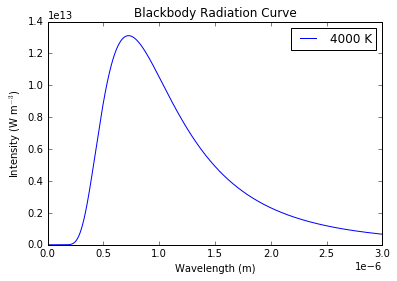

In [12]:

plt.plot(wavelengths, planck(wavelengths, 4000),'b', label='4000 K')
#plt.plot(wavelengths, planck(wavelengths, 5000),'g', label='5000 K')
#plt.plot(wavelengths, planck(wavelengths, 6000), 'y',label='6000 K')
#plt.plot(wavelengths, planck(wavelengths, 7000), 'r',label='7000 K')
plt.title('Blackbody Radiation Curve')
plt.xlabel('Wavelength (m)')
plt.ylabel('Intensity (W m$^{-3}$)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

----------

### _Ideal Filters_

Now we're going to look at our stars through filters. These filters will act as little snippets of the blackbody radiation curve with a set intensity over a set of wavelengths. We will use these to get an apparent magnitude. 

The letters of each filter coincide with the range of wavelengths it covers. For example, "I" stands for "infrared" and coincides with wavelengths around 800 nm. Here is a table of some of these filters and their repsective wavelengths: 

| Filter Letter | Effective Midpoint ($\lambda_{eff}$) | Bandwidth ($\Delta \lambda$) | Description |
|---|---|---|---|
|U|365 nm|$\pm$ 66 nm|ultraviolet|
|B|445 nm|$\pm$ 94 nm|blue|
|V|551 nm|$\pm$ 88 nm|visual|
|J|1220 nm|$\pm$ 213 nm|(upper infrared)|
|H|1630 nm|$\pm$ 307 nm|(upper infrared)|
|K|2190 nm|$\pm$ 390 nm|(upper infrared)|

The source for this table and more on this filter notation system can be found here: https://en.wikipedia.org/wiki/Photometric_system

Here, we define our __getfilter__ function. This will allow us to call the specific type of filter we want. Each filter represents a small span of wavelengths on the electromagnetic spectrum, represented by __lambda_eff__ plus or minus __halfwidth__. The zeropoint intensity of each filter is given as __I0__. 

In [13]:
def getfilter(band):
    
    if band=='K':
        lambda_eff=2.159         # micron
        halfwidth=0.262/2.0      # micron
        I0=4.283E-14             # W cm^-2 micron^-1

    elif band=='H':
        lambda_eff=1.662
        halfwidth=0.251/2.0
        I0=1.133E-13

    elif band=='J':
        lambda_eff=1.235
        halfwidth=0.162/2.0
        I0=3.129E-13

    elif band=='U':
        lambda_eff=0.365
        halfwidth=0.066/2.0
        I0=4.19E-12

    elif band=='B':
        lambda_eff=0.445
        halfwidth=0.094/2.0
        I0=6.60E-12

    elif band=='V':
        lambda_eff=0.551
        halfwidth=0.088/2.0
        I0=3.61E-12

    elif band=='R':
        lambda_eff=0.658
        halfwidth=0.138/2.0
        I0=2.25E-12

    elif band=='I':
        lambda_eff=0.806
        halfwidth=0.149/2.0
        I0=1.22E-12
    
    return lambda_eff, halfwidth, I0    ## because we need these as inputs to our next functions

Here we define another set of filters, __getfilter2__. The only difference between these two is their source. It might be fun to test them against each other, but for this runthough, we have only used the first getfilter function. 

In [14]:
def getfilter2(band): 
    
    if band=='U':
        lambda_eff = 0.36  ## um
        halfwidth = 0.06   ## um
        I0 = 4.175E-8      ## W m^-2 um_-1
        
    elif band=='B':
        lambda_eff = 0.438
        halfwidth = 0.09/2.0
        I0 = 6.320E-8
        
    elif band=='V':
        lambda_eff = 0.545
        halfwidth = 0.085/2.0
        I0 = 3.631E-8
        
    elif band=='R':
        lambda_eff = 0.641
        halfwidth = 0.15/2.0
        I0 = 2.177E-8
        
    elif band =='I':
        lambda_eff = 0.798
        halfwidth = 0.15/2.0
        I0 = 1.126E-8
        
    elif band=='J':
        lambda_eff = 1.235
        halfwidth = 0.162/2.0
        I0 = 3.129E-9
        
    elif band=='H':
        lambda_eff = 1.662
        halfwidth = 0.251/2.0
        I0 = 1.133E-9
        
    elif band=='K':
        lambda_eff = 2.159
        halfwidth = 0.262/2.0
        I0 = 4.283E-10
        
    elif band=='u':
        lambda_eff = 0.35
        halfwidth = 0.046/2.0
        I0 = 8.595E-8
        
    elif band=='g':
        lambda_eff = 0.483
        halfwidth = 0.099/2.0
        I0 = 4.669E-8
        
    elif band=='r':
        lambda_eff = 0.626
        halfwidth = 0.096/2.0
        I0 = 2.780E-8
        
    elif band=='i':
        lambda_eff = 0.767
        halfwidth = 0.106/2.0
        I0 = 1.852E-8
        
    elif band=='z':
        lambda_eff = 0.910
        halfwidth = 0.125/2.0
        I0 = 1.315E-8
        
    return lambda_eff, halfwidth, I0

Let's see what the intensity versus wavelength plots look like, using the first filter (K) from the first getfilter function as an example: 

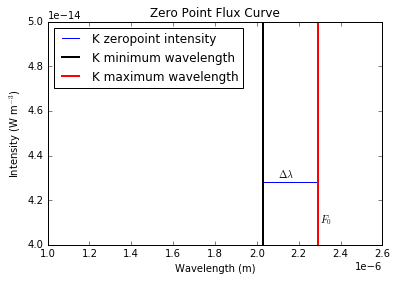

In [15]:
lambda_eff, halfwidth, I0 = getfilter('K')

x = np.arange((lambda_eff-halfwidth)*1e-6, (lambda_eff + halfwidth)*1e-6, 1e-9)

I = np.full((len(x), 1), I0)
        
x1 = (lambda_eff-halfwidth)*1e-6
x2 = (lambda_eff + halfwidth)*1e-6
plt.plot(x, I, label='K zeropoint intensity')
K_mini = plt.axvline(x1, ymin=0, ymax = 1, linewidth=2, color='k', label='K minimum wavelength')
K_maxi = plt.axvline(x2, ymin=0, ymax = 1, linewidth=2, color='r', label='K maximum wavelength')
plt.ylim((4e-14, 5e-14))
plt.xlim((1e-6, 2.6e-6))
plt.title('Zero Point Flux Curve')
plt.xlabel('Wavelength (m)')
plt.ylabel('Intensity (W m$^{-3}$)')
plt.legend(loc='best')
plt.text(2.1e-6, 4.3e-14, r'$\Delta\lambda$')
plt.text(2.3e-6, 4.1e-14, r'$F_{0}$')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

So, to calculate our __zeropoint flux__, we simply multiply the zeropoint intensity by the range of wavelengths it covers: 

$$ F_{0} = I_{0} \Delta\lambda $$

Where flux is usually given in Watts/m$^2$, intensity in Watts/m$^3$, and wavelength in m. 


-----

### _Magnitudes through Ideal Filters_

It seems like both our blackbody curves and our ideal filters are good. Now let's see how our wavelength intervals for each filter can be incorporated into this. Let's again use the K-band filter's wavelength range: 

/Users/graceeliason/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


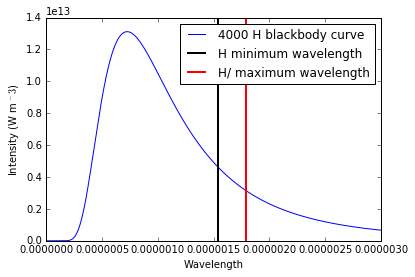

In [16]:
lambda_eff, halfwidth, I0 = getfilter('H')

planck_4000 = plt.plot(wavelengths, planck(wavelengths, 4000),'b', label='4000 H blackbody curve')
plt.ylabel('Intensity (W m$^-3$)')
plt.xlabel('Wavelength')

x1 = (lambda_eff-halfwidth)*10**(-6)
x2 = (lambda_eff+halfwidth)*10**(-6)

K_mini = plt.axvline(x1, ymin=0, ymax = 1, linewidth=2, color='k', label='H minimum wavelength')
K_maxi = plt.axvline(x2, ymin=0, ymax = 1, linewidth=2, color='r', label='H/ maximum wavelength')

plt.legend(loc='best')

The area under the blackbody curve will give us the __ideal flux__ to put into our magnitude function, just as it did with the filter; except this time, we must __integrate__: 

$$ F (T) = \int_{\Delta\lambda} F_{\lambda}(T) d\lambda $$

Where $f$ is the ideal flux, $F_{\lambda}(T)$ is the planck flux density, and $\Delta \lambda$ is designated by our filter. 

So between this black and this red line is where we're going to integrate the blackbody curve. Notice that this is only at one specific main sequence temperature - we'll be doing this for __many temperatures__, so, in the end, we should get an __array__.  

-----
Here we define our ideal magnitude function as __ideal_mag__. Its end goal is to get the magnitude 

$$ m = -2.5 \log \frac{F(T)}{F_0} $$

for our given filter over a specific range of wavelengths. This magnitude is ideal because it depends only on an ideal filter and the blackbody curve, not the actual filter nor the actual background source. (That will come later!)

We start off by setting the blackbody curve's integral limits __a__ and __b__ to the minimum and maximum wavelengths that can be observed through the chosen filter. 

Then, we find the zeropoint flux __F0__ to input into our magnitude function by multiplying the zeropoint intensity by the range of filter wavelengths. 

We then create a __flux_array__ and a __magnitude_array__ to collect our blackbody fluxes and corresponding magnitudes. These are arrays because the value changes as temperature change, i.e. each value in the array represents the value at a specific main sequence temperature. 

The __temperature for-loop__ takes in a specified temperature on the main sequence and calculates the flux of the blackbody curve at that temperature over the filter-specific range of wavelengths. This is done by calling the planck function; then, the area underneath this curve is found using the __quad__ integration tool.  

And, finally, the __flux for-loop__ takes each flux calculated in the previous for-loop and inputs it into the given magnitude function. 

In [17]:
def ideal_mag(lambda_eff, halfwidth, I0):    ## takes in the following arguments for certain filters
     
    a = (lambda_eff - halfwidth)*1e-6   ## upper integral limit; *1e-6 to get from microns to meters
    b = (lambda_eff + halfwidth)*1e-6   ## lower integral limit; *1e-6 to get from microns to meters
    
    F0 = I0*2*halfwidth*1e-2         ## *1e4 to get from /m^-2 to W/m^2; *1e-6 to get the correct wavelengths
    
    flux_array = np.empty(len(temperatures))                     ## just defining an array to put our calculated fluxes in
    magnitude_array = np.empty(len(temperatures))                 ## and one for our magnitudes as well 
    
    for index,t in enumerate(temperatures):              ## iterating through all possible temperatures to get flux
        flux = quad(planck, a, b, args=(t))[0]    ## quad takes the integral from a to b, and I called the planck function because that's what we're integrating 
        flux = flux/(4*np.pi*(3.086e17)**2)       ## NOTE that 'planck' is divided by 4*pi*(10pc)^2 to get a more realistic flux (stars are far away from us)
        flux_array[index] = flux                 ## this collects our flux values in an array
        
    for index,F in enumerate(flux_array):                          ## iterating through all flux values in our flux array
        magnitude = -2.5*np.log10(F/F0)       ## this is the function we want
        magnitude_array[index] = magnitude   
        
    return magnitude_array

---
### _Results and Applications_

Now that we have all the functions we need, we're going to apply them to some actual filter data. 

**NOTE: This is for an ideal filter and an ideal blackbody with no dust extinction.

In [18]:
lambda_eff, halfwidth, I0 = getfilter('K') ## calling the getfliter function to specify filter

K_mag_idealfilter = ideal_mag(lambda_eff, halfwidth, I0) ## calling the planck_mag function using our band-specific variables

In [19]:
lambda_eff, halfwidth, I0 = getfilter('H') ## calling the getfliter function to specify filter

H_mag_idealfilter = ideal_mag(lambda_eff, halfwidth, I0)

In [20]:
lambda_eff, halfwidth, I0 = getfilter('J') ## calling the getfliter function to specify filter

J_mag_idealfilter = ideal_mag(lambda_eff, halfwidth, I0)

Now that we have the magnitudes in the H, K, and J bands with ideal filters, we can calculate the difference between them. Plotting them against temperature gives us color for temperature; plotting them against each other gives us a nice ratio. 

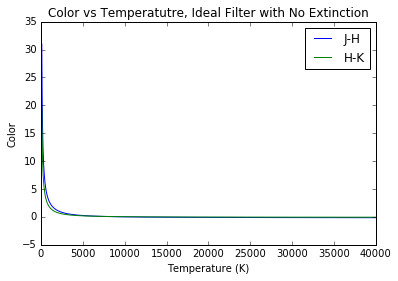

In [21]:
J_H_idealfilter = J_mag_idealfilter - H_mag_idealfilter 
H_K_idealfilter = H_mag_idealfilter - K_mag_idealfilter

plt.plot(temperatures, J_H_idealfilter, label='J-H')
plt.plot(temperatures, H_K_idealfilter, label='H-K')

plt.title('Color vs Temperatutre, Ideal Filter with No Extinction')
plt.xlabel('Temperature (K)')
plt.ylabel('Color')

plt.legend(loc='best')

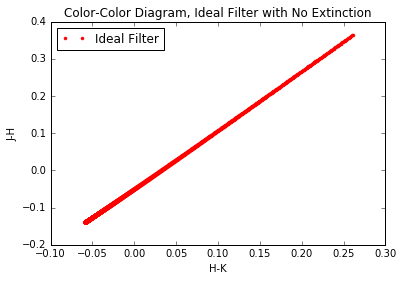

In [22]:
plt.plot(H_K_idealfilter[400:4000], J_H_idealfilter[400:4000], 'r.', label='Ideal Filter')

plt.title('Color-Color Diagram, Ideal Filter with No Extinction')
plt.ylabel("J-H")
plt.xlabel('H-K')

plt.legend(loc='best')

-----
## Part 2: The Real Filter


### _Real Filters_ 

Now we recognize that what we see will not exactly follow the rectangular filter curve as seen in Part 1. This is where the observed data comes in. Using data from http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html, we can find the __actual filters__, as opposed to the ideal filters, as we did prior. 

The main difference here is that we're __multiplying the planck blackbody curve by the real filter spectral response before integrating it__. This area under this spectral response curve is normalized to equal 1, so multiplying it by our filter will not affect the blackbody curve's overall flux. We keep the zeropoint filter intensity and wavelength range the same because they are instrinsic properties of the filters themselves. This will slighty alter our magnitude function to: 

$$ m = -2.5 \log \frac{F(T)_{+ filter}}{F_0} $$

Where 

$$ F(T)_{+ filter} = \int W_{\lambda} F_{\lambda}(T) d\lambda $$

Making our new magnitude function
 
$$ m = -2.5 \log \frac{\int W_{\lambda} F_{\lambda}(T) d\lambda}{F_0} $$

And $W_{\lambda}$ is the real filter spectral response, $F_{\lambda}(T) $ is the Planck flux density, and $F_0$ is the zeropoint flux. 

-----

The data from this webpage has been manually-entered below. Anything with the __ _wav__ extension represents wavelengths in microns; anything with the __ _rsr__ extension represents relative spectral response; and, as can be assumed, J represents the __J-band filter__, H represents the __H-band filter__, and K represents the __K-band filter__. 


In [23]:

J_wav = np.array([1.062, 1.066,1.07,1.075,1.078,1.082,1.084,1.087,1.089,1.093,1.096,1.102,1.105,1.107,1.109,
         1.112,1.116,1.117,1.12,1.123,1.128,1.129,1.132,1.134,1.138,1.14,1.143,1.147,1.154,1.159,1.164
         ,1.167,1.17,1.173,1.175,1.179,1.182,1.186,1.188,1.192,1.195,1.199,1.202,1.209,1.216,1.221,1.227,1.231,1.236
         ,1.24,1.244,1.247,1.253,1.255,1.258,1.26,1.265,1.27,1.275,1.279,1.286,1.292,1.297,1.302,1.305,1.307,1.31
         ,1.313,1.316,1.319,1.323,1.326,1.33,1.333,1.334,1.336,1.339,1.343,1.346,1.349,1.353,1.355,1.36,1.363,1.37
         ,1.373,1.377,1.383,1.388,1.392,1.395,1.396,1.397,1.398,1.4,1.401,1.402,1.404,1.406,1.407,1.41,1.412,1.416
         ,1.421,1.426,1.442,1.45])
J_rsr = np.array([0,4.07E-04,1.54E-03,2.67E-03,5.51E-03,1.23E-02,2.03E-02,3.06E-02,4.05E-02,5.15E-02,5.64E-02,7.18E-02
         ,0.273603,0.340997,0.358446,0.380134,0.330668,0.239548,0.250062,0.283301,0.258233,0.251474,0.538119
         ,0.223168,0.536893,0.110203,0.529207,0.26194,0.320155,0.1743,0.607031,0.617933,0.676289,0.72794,0.746531
         ,0.830404,0.790307,0.809605,0.836888,0.835984,0.749936,0.708013,0.698759,0.704854,0.700382,0.732765,0.705725
         ,0.842431,0.921873,0.952505,0.967585,0.959508,0.922697,0.892978,0.852943,0.802308,0.750078,0.678072,0.652417
         ,0.638754,0.642413,0.64856,0.68238,0.752903,0.775942,0.811828,0.777008,0.72103,0.952459,0.855137,0.841401
         ,1,0.894736,0.854912,0.537894,0.279866,0.906532,0.689345,0.553327,0.243177,1.44E-02,1.89E-04,4.01E-02
         ,4.54E-03,3.20E-04,3.72E-02,5.38E-04,0,1.44E-04,3.30E-03,3.14E-04,8.48E-03,2.54E-02,0.118446,1.36E-04
         ,6.10E-05,5.21E-02,1.04E-02,4.78E-02,4.20E-04,2.37E-03,5.26E-03,8.65E-03,7.29E-04,3.48E-04,3.78E-04,0])

H_wav = np.array([1.289,1.315,1.341,1.368,1.397,1.418,1.44,1.462,1.478,1.486,1.493,1.504,1.515,1.528,1.539,1.546,1.551,1.556
         ,1.565,1.572,1.577,1.583,1.592,1.597,1.602,1.613,1.619,1.628,1.633,1.642,1.648,1.657,1.659,1.671,1.684
         ,1.701,1.715,1.727,1.739,1.746,1.751,1.753,1.756,1.764,1.775,1.785,1.79,1.796,1.803,1.81,1.813,1.818,1.828
         ,1.835,1.85,1.871,1.893,1.914])
H_rsr = np.array([0,5.92E-08,1.27E-07,0,0,1.71E-05,5.11E-04,2.77E-03,8.09E-03,2.87E-02,8.71E-02,0.201449,0.438159,0.686357
         ,0.818076,0.882073,0.911825,0.926872,0.929288,0.872747,0.856619,0.882556,0.918084,0.926654,0.907594
         ,0.925974,0.920496,0.924198,0.923533,0.941788,0.949134,0.980658,0.993744,1,0.956052,0.924116,0.98212
         ,0.991589,0.988683,0.979168,0.968184,0.93704,0.918998,0.842264,0.667111,0.269402,0.45163,0.173062,0.107726
         ,7.07E-02,5.11E-03,2.00E-02,3.92E-04,1.53E-06,5.95E-05,0,3.05E-05,0])

K_wav = np.array([1.9,1.915,1.927,1.934,1.939,1.948,1.957,1.962,1.969,1.976,1.981,
         1.989,1.99,1.998,2.008,2.014,2.019,2.028,2.037,2.045,2.061,2.072,2.075,2.082,2.089,2.099,2.106,2.113,2.12,2.124,2.138,2.145,2.155,
         2.169,2.176,2.185,2.197,2.208,2.213,2.218,2.232,2.237,2.248,2.256,2.26,2.263,2.265,2.27,2.272,2.276,2.277,2.281,2.284,2.286,2.291, 
         2.293,2.295,2.297,2.299,2.306,2.311,2.316,2.32,2.325,2.328,2.335,2.339,2.344,2.346,2.352,2.361,2.363,2.37,2.375,2.384,2.399])
K_rsr = np.array([0,8.16E-06,1.61E-05,1.59E-04,4.95E-04,5.38E-03,1.19E-02,1.97E-02,4.22E-02,8.73E-02,0.152759,
         0.248173,0.190245,0.233884,0.294551,0.398217,0.336603,0.620746,0.764986,0.746412,0.625063,0.725492,0.689468,0.787906,0.818135,0.822833,0.863294,
         0.877829,0.854895,0.895329,0.918862,0.926769,0.926657,0.900943,0.922819,0.842755,0.945854,0.980363,0.987926,0.984788,0.964659,0.981633,0.983449,
         0.961316,0.979226,1,0.963168,0.981193,0.968068,0.910892,0.982136,0.889606,0.891766,0.94238,0.840424,0.804239,0.70767,0.657619,0.560736,0.443653,
         0.348239,0.230228,0.162597,0.135967,9.21E-02,6.24E-02,4.31E-02,3.40E-02,3.10E-02,1.18E-02,6.83E-03,7.49E-04,3.00E-03,2.10E-03,4.06E-04,0])


Let's see what this looks like by using the H-band as an example: 

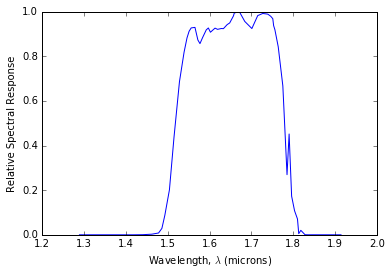

In [24]:
plt.plot(H_wav, H_rsr, label="H-band")
plt.xlabel('Wavelength, ${\lambda}$ (microns)')
plt.ylabel('Relative Spectral Response')

Now this curve is similar in shape to our filters but is a more realistic representation of what comes through the filter. We multiply this curve by our ideal filter - because this curve is normalized, multiplying them together will preserve our flux. 

-------

### _Blackbody Curve (in microns)_

It is important to note that our wavelength ranges were given to us in __microns__. To correct our planck function for this, I'll simply create a second planck function called __planck_microns__.

In [25]:
## creating a second planck curve that will take in MICRONS as opposed to meters

def planck_microns(x, T):
    
    h = 6.626e-34      ## J s
    c = 3.0e+8         ## m s^-1
    k = 1.38e-23       ## J K^-1

    a0 = 2.0*(np.pi)*h*c**2
    b0 = (h*c)/((x*1e-6)*k*T)
    intensity = a0 / (((x*1e-6)**5) * (np.exp(b0) - 1.0) )
    
    return intensity

wavelength_microns = np.arange(1, 3, 1e-3) ## for our new wavelengths IN MICRONS

And, to test our planck again, let's create the same plot we created in Part 1: 

/Users/graceeliason/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


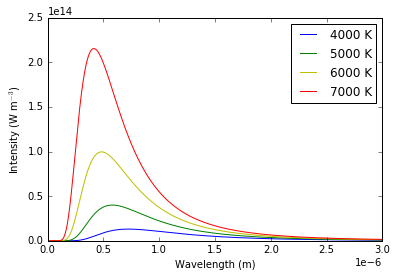

In [26]:
plt.plot(wavelengths, planck(wavelengths, 4000),'b', label='4000 K')
plt.plot(wavelengths, planck(wavelengths, 5000),'g', label='5000 K')
plt.plot(wavelengths, planck(wavelengths, 6000), 'y',label='6000 K')
plt.plot(wavelengths, planck(wavelengths, 7000), 'r',label='7000 K')
plt.xlabel('Wavelength (m)')
plt.ylabel('Intensity (W m$^{-3}$)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

---- 

Here we make a function that multiplies these two together called __planck_and_filter__. To do this, we will evaluate the planck curve over the given wavelengths and multiply that by our relative spectral response. The result will be an array of curves, one for each temperature.

In [27]:
## this function will multiply our actual data by our blackbody curve, i.e. the two functions seen above 

def planck_and_filter(x, y, T):
    
    intensity = (planck_microns(x, T))*y

    return intensity
    

Let's see what this curve looks like using the H-band once again as an example. This is a plot of the two plots above multiplied together. 

And, since our goal is to then integrate it, we can use the __trapz__ tool to do so. 

154223104278.82242

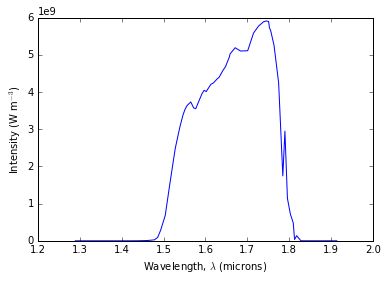

In [28]:
## here are the two curves multiplied together for 1000 K

H = planck_and_filter(H_wav, H_rsr, 1000)

plt.plot(H_wav, H)
plt.xlabel('Wavelength, ${\lambda}$ (microns)')
plt.ylabel('Intensity (W m$^{-3}$)')

np.trapz(H)

----

### _Magnitudes through Real Filters_

Putting this all together, we're going to be doing nearly the same thing we did in the ideal_mag function, only this time, we'll be using the trapz tool to find the area under the planck_and_filterfilter curve. 

No need to set the blackbody curve's integral limits since we're integrating over the given curve.

We then create a __flux_array__ and a __magnitude_array__ to collect our blackbody fluxes and corresponding magnitudes. These are arrays because the value changes as temperature change, i.e. each value in the array represents the value at a specific main sequence temperature. 

The __temperature for-loop__ takes in a specified temperature on the main sequence and calculates the flux of the blackbody curve at that temperature over the filter-specific range of wavelengths. This is done by calling the planck_and_filter function; then the area underneath it is found using the __trapz__ tool.

And, finally, the __flux for-loop__ takes each flux calculated in the previous for-loop and inputs it into the given magnitude function. 

In [29]:
## defining our actual magnitude function
## this time, we're finding the area under our planck_and_filter curve for a range of temperatures on the main sequence 

def actual_mag(lambda_eff, halfwidth, I0, wav, rsr, temperatures):        ## it takes in the following arguments for certain filters
         
    a = (lambda_eff - halfwidth)*1e-6   ## upper integral limit; *1e-6 to get from microns to meters
    b = (lambda_eff + halfwidth)*1e-6   ## lower integral limit; *1e-6 to get from microns to meters
    
    F0 = I0*2*halfwidth*1e-2         ## *1e4 to get from /m^-2 to W/m^2; *1e-6 to get the correct wavelengths
       
    flux_array = np.empty(len(temperatures))                               ## just defining an array to put our calculated fluxes in
    magnitude_array = np.empty(len(temperatures))                         ## and one for our magnitudes as well 
    
    for index,t in enumerate(temperatures):        
        flux = np.trapz(planck_and_filter(wav, rsr, t))   ## trapz takes the integral from a to b, and I called the planck_and_filter function because that's what we're integrating 
        flux_array[index] = flux                          ## this collects our flux values in an array
    
    for index, F in enumerate(flux_array):                         ## iterating through all flux values in our flux array
        magnitude = -2.5*np.log10(F/F0)       ## this is the function we want
        magnitude_array[index] = magnitude     ## again calculating 
    
    return magnitude_array

----
### _Results and Applications_ 

In [30]:
## for the H-band filter

lambda_eff, halfwidth, I0 = getfilter('H')

H_mag_realfilter = actual_mag(lambda_eff, halfwidth, I0, H_wav, H_rsr, temperatures) 

In [31]:
## for the J-band filter

lambda_eff, halfwidth, I0 = getfilter('J')

J_mag_realfilter = actual_mag(lambda_eff, halfwidth, I0, J_wav, J_rsr, temperatures) 

In [32]:
## for the K-band filter 

lambda_eff, halfwidth, I0 = getfilter('K')

K_mag_realfilter = actual_mag(lambda_eff, halfwidth, I0, K_wav, K_rsr, temperatures) 

Let's plot Color versus Temperature for the blackbody curve with real filters: 

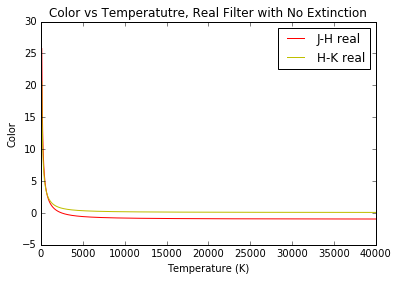

In [33]:
J_H_realfilter = J_mag_realfilter - H_mag_realfilter
H_K_realfilter = H_mag_realfilter - K_mag_realfilter

plt.plot(temperatures, J_H_realfilter,'r', label='J-H real')
plt.plot(temperatures, H_K_realfilter,'y', label='H-K real')
plt.title('Color vs Temperatutre, Real Filter with No Extinction')
plt.ylabel('Color')
plt.xlabel('Temperature (K)')

plt.legend(loc='best')

This doesn't tell us much, so we're going to plot Color versus Temperature for ideal and real filters: 

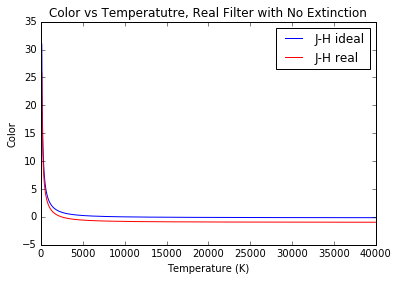

In [34]:
plt.plot(temperatures, J_H_idealfilter,'b', label='J-H ideal')
plt.plot(temperatures, J_H_realfilter,'r', label='J-H real')
plt.title('Color vs Temperatutre, Real Filter with No Extinction')
plt.ylabel('Color')
plt.xlabel('Temperature (K)')

plt.legend(loc='best')

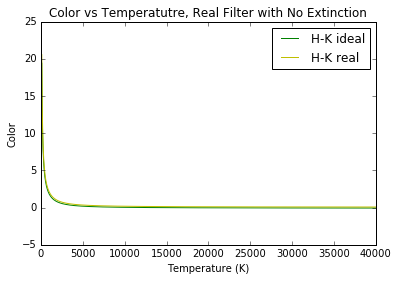

In [35]:
plt.plot(temperatures, H_K_idealfilter,'g', label='H-K ideal')
plt.plot(temperatures, H_K_realfilter,'y', label='H-K real')
plt.title('Color vs Temperatutre, Real Filter with No Extinction')
plt.ylabel('Color')
plt.xlabel('Temperature (K)')

plt.legend(loc='best')

This tells us that the real filter shifts magnitude slightly downward in the J-H and slightly upward in the H-K. Let's plot the color-color diagram for the real and ideal filters: 

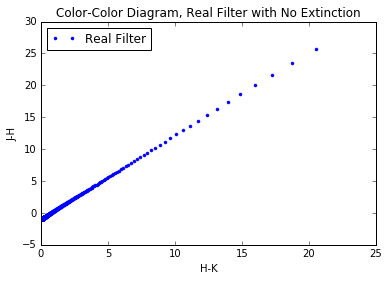

In [36]:
plt.plot(H_K_realfilter, J_H_realfilter,'b.', label='Real Filter')

plt.title('Color-Color Diagram, Real Filter with No Extinction')
plt.ylabel("J-H")
plt.xlabel('H-K')

plt.legend(loc='best')

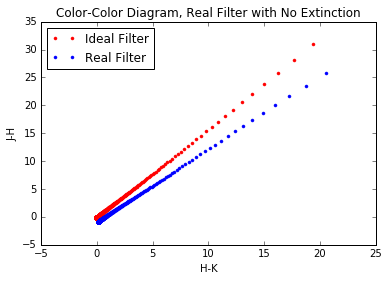

In [37]:
plt.plot(H_K_idealfilter, J_H_idealfilter,'r.', label='Ideal Filter')
plt.plot(H_K_realfilter, J_H_realfilter,'b.', label='Real Filter')

plt.title('Color-Color Diagram, Real Filter with No Extinction')
plt.ylabel("J-H")
plt.xlabel('H-K')

plt.legend(loc='best')

-----
## Part 3: The Filter Curve with Dust Extinction


### _Extinction_

Say that 

$$ A_{\lambda} = - 2.5 \log \frac{F_{after dust}}{F_{\lambda}} $$

$$ F_{after dust} = F_{\lambda} 10^{-0.4 A_{\lambda}} $$


And

$$ m_{ext} = -2.5 \log \frac{\int W_{\lambda} F_{afterdust} d\lambda}{\int W_{\lambda} F_{\lambda}  d\lambda} $$

$$ m_{ext} = -2.5 \log \frac{\int W_{\lambda} F_{\lambda} 10^{-0.4A_{\lambda}} d\lambda}{\int W_{\lambda} F_{\lambda}  d\lambda} $$

Where $A_{\lambda}$ is dust extinction, 
$F_{afterdust}$ is our observed flux after dust extinction,
$F_{\lambda}$ is the Planck curve, 
$W_{\lambda}$ is is our filter data, 
and $\Delta m$ is our change in magnitude from before and after extinction.  

Our next step is to plot the real filter curves including extinction. 

Luckily, we were given a function to find and use several extinction values. 

In [38]:
def getFMext(wave,R,source):
    
    """ 
        Input: wavelength in microns, nominal R = 3.1
            source='f99' for Fitzpatrick 1999 or ='fmunred' for fmunred.pro
            source='f99 tables' reproduces common misunderstanding from that paper
        Output: Al/EBV, so user must divide by R to get Al/AV !!!
    """
    
    import numpy as np
    import scipy.interpolate as interp
    
    x_anchors = 1.0E4 / np.array([np.inf, 26500., 12200., 6000., 5470., 4670., 4110.]) # microns
    
    if source=="f99 tables": # Don't use, for demonstration only
        a26500= 0.265
        a12200= 0.829
        a6000 = -0.426 +1.0044*R
        a5470 = -0.050 +1.0016*R
        a4670 =  0.701 +1.0016*R
        a4110 =  1.208 +1.0032*R -0.00033*R**2.0 # typo in the paper -KAL
    
    elif source=="f99": 
        a26500= 0.265*R/3.1
        a12200= 0.829*R/3.1
        a6000 = -0.426 +1.0044*R
        a5470 = -0.050 +1.0016*R
        a4670 =  0.701 +1.0016*R
        a4110 =  1.208 +1.0032*R -0.00033*R**2.0 # typo in the paper -KAL

    elif source=="fmunred":
        a26500= 0.26469*R/3.1
        a12200= 0.82925*R/3.1
        a6000 = -4.22809e-01 +1.00270*R+2.13572e-04*R**2.0
        a5470 = -5.13540e-02 +1.00216*R-7.35778e-05*R**2.0
        a4670 =  7.00127e-01 +1.00184*R-3.32598e-05*R**2.0
        a4110 =  1.19456 +1.01707*R -5.46959e-03*R**2.0+ 7.97809e-04*R**3.0 -4.45636e-05*R**4.0

    a_anchors = np.array([0.0, a26500, a12200, a6000, a5470, a4670, a4110])

    f=interp.interp1d(x_anchors, a_anchors, kind='cubic')    
    
    
    return f(1.0/wave)


Now, let's create a function (__get_A__) that creates an array that collects our __extinction (A) values__. Because these are dependent upon our ranges of wavelengths for each filter, we iterate through the __getFMext__ function for each wavelength in the set. 

We check this by plotting the extinction against the wavelengths, as can be seen below. 


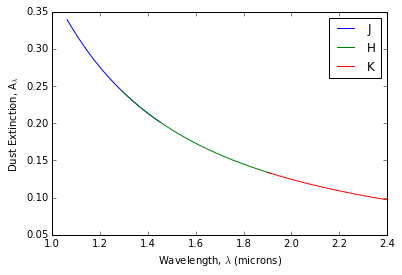

In [39]:
def get_A(wavelengths):
    
    A_array = getFMext(wavelengths, 3.1, "fmunred") / 3.1
    
    return A_array

plt.plot(J_wav, get_A(J_wav), label='J')
plt.plot(H_wav, get_A(H_wav), label='H')
plt.plot(K_wav, get_A(K_wav), label='K')


plt.legend(loc='upper right')
plt.xlabel('Wavelength, ${\lambda}$ (microns)')
plt.ylabel('Dust Extinction, A$_{\lambda}$')

This plot makes sense - each of our bandwidth JHK only exists over a certain wavelength interval and the extinction should be continuous at each boundary. 

------

### _Real Filters with Extinction_

Now let's plot the intensity observed through our filters with the extinction and compare it to our previous graph. 

In [40]:
def numerator(wav, rsr, T): ## defining a function for the numerator of our new magnitude 
    
    intensity = (planck_microns(wav, T))*rsr*10**(-0.4*(getFMext(wav, 3.1, "fmunred")))

    return intensity
    

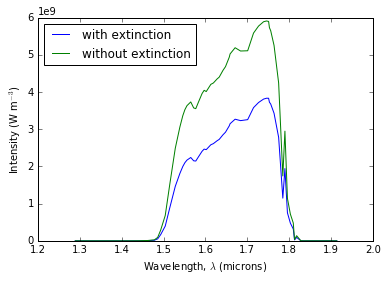

In [41]:
H_n = numerator(H_wav, H_rsr, 1000) ## calling the numerator function
H = planck_and_filter(H_wav, H_rsr, 1000) ## here is our previous intensity curve

plt.plot(H_wav, H_n, label='with extinction')
plt.plot(H_wav, H, label='without extinction')
plt.xlabel('Wavelength, ${\lambda}$ (microns)')
plt.ylabel('Intensity (W m$^{-3}$)')
plt.legend(loc='best')

---- 

### _Magnitudes through Real Filters with Extinction_

Great! Now let's create a function that give us the magnitude with extinction. The equation we'll be using is, again, 

$$ m_{ext} = -2.5 \log \frac{\int W_{\lambda} F_{\lambda} 10^{-0.4A_{\lambda}} d\lambda}{\int W_{\lambda} F_{\lambda}  d\lambda} $$

Where $A_{\lambda}$ is dust extinction,
$F_{\lambda}$ is the Planck curve, 
$W_{\lambda}$ is is our filter data, 
and $\Delta m$ is our change in magnitude from before and after extinction.  

We do essentially the same thing as in the last magnitude function, this time separating our magnitude into the numerator and the denominator. We created and tested the numerator and denominator functions above (the numerator in this section, the denominator in the previous section). Now, we take the integral of each function using the __trapz__ function and place them into the magnitude function. We do this over all temperatures. 

In [42]:
def mag_extinction(wav, rsr, temperatures):   
    
    numer_array = np.empty(len(temperatures))
    denom_array = np.empty(len(temperatures))                          
    magnitude_array = np.empty(len(temperatures))     
    
    for index,t in enumerate(temperatures): 
        numer = np.trapz(numerator(wav, rsr, t))
        numer_array[index] = numer
        
        denom = np.trapz(planck_and_filter(wav, rsr, t))
        denom_array[index] = denom
    
    for index, (n, d) in enumerate(zip(numer_array, denom_array)):
        magnitude = -2.5*np.log10(n/d)      
        magnitude_array[index] = magnitude
        
    return magnitude_array
    

### _Results and Applications_


In [43]:
K_extinction = mag_extinction(K_wav, K_rsr, temperatures)
H_extinction = mag_extinction(H_wav, H_rsr, temperatures)
J_extinction = mag_extinction(J_wav, J_rsr, temperatures)

J_H_extinction = J_extinction - H_extinction
H_K_extinction = H_extinction - K_extinction

J_H_realfilter_extinction = J_H_realfilter + J_H_extinction
H_K_realfilter_extinction = H_K_realfilter + H_K_extinction

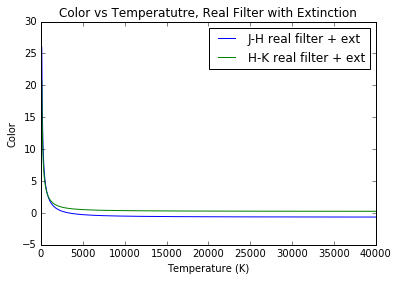

In [44]:
plt.plot(temperatures, J_H_realfilter_extinction, label='J-H real filter + ext')
plt.plot(temperatures, H_K_realfilter_extinction, label='H-K real filter + ext')

plt.title('Color vs Temperatutre, Real Filter with Extinction')
plt.xlabel('Temperature (K)')
plt.ylabel('Color')

plt.legend(loc='best')

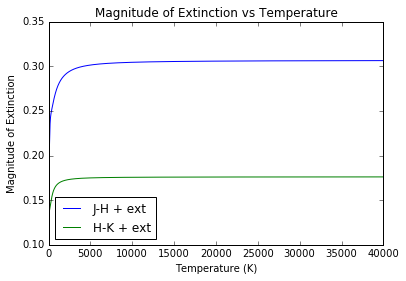

In [45]:
plt.plot(temperatures, J_H_extinction, label='J-H + ext')
plt.plot(temperatures, H_K_extinction, label='H-K + ext')

plt.title('Magnitude of Extinction vs Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnitude of Extinction')

plt.legend(loc='best')

/Users/graceeliason/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


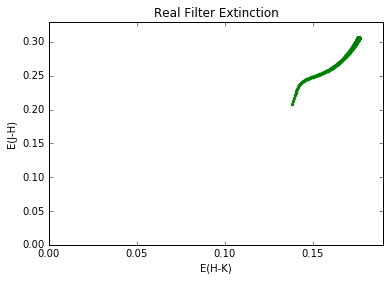

In [46]:
plt.plot(H_K_extinction,J_H_extinction,'g.')

plt.title('Real Filter Extinction')
plt.xlabel('E(H-K)')
plt.ylabel('E(J-H)')
plt.xlim(0,0.19)
plt.ylim(0,0.33)

plt.legend(loc='best')

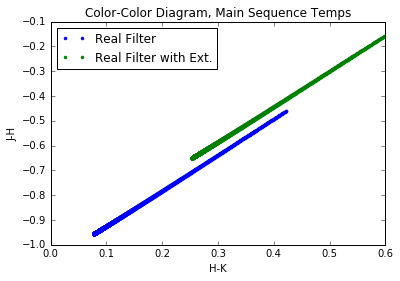

In [64]:
plt.plot(H_K_realfilter[400:4000],J_H_realfilter[400:4000],'b.', label="Real Filter")
plt.plot(H_K_realfilter_extinction[400:4000],J_H_realfilter_extinction[400:4000],'g.', label="Real Filter with Ext.")

plt.title('Color-Color Diagram, Main Sequence Temps')
plt.xlabel('H-K')
plt.ylabel('J-H')
plt.xlim(0,0.6)
plt.ylim(-1, -.1)

plt.legend(loc='best')

In [48]:
temperatures[400:4000]

array([ 4100,  4110,  4120, ..., 39970, 39980, 39990])

In [49]:
def R_func(xext, yext): 
    
    slope_array = np.empty(len(temperatures))     
    
    for index, (x,y) in enumerate(zip(xext, yext)):
        slope = (y/x)      
        slope_array[index] = slope
    
    return slope_array

In [50]:
R_func(H_K_extinction,J_H_extinction)

array([ 1.51475244,  1.53508228,  1.55809924, ...,  1.73989511,
        1.73989559,  1.73989606])

This was actually our __end goal__ all along. What we would like to know is the __slope__ at each point. Let's do this by creating a little function: 

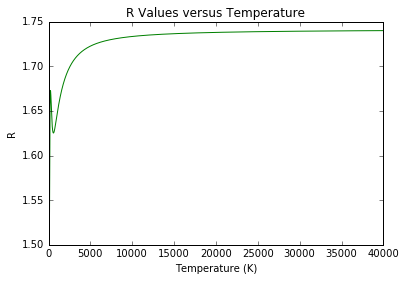

In [60]:
plt.plot(temperatures,R_func(H_K_extinction,J_H_extinction),'g')

plt.title('R Values versus Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('R')

plt.legend(loc='best')

## Part 4: Issues and Proposed Solutions

### Notes

Real Background Sources
- _GOAL:_ create function that will intake more realistic stellar spectra (models, idealized, real)

U,B Filters with Extinction 
- _PROBLEM:_ unable to upload utilize extinction function on U and B filters
- _PLACE:_ Parts 3, 4
- _GOAL:_ utilize function that has the range to interpolate these values

Real Filter Data Input
- _PROBLEM:_ unable to upload .txt files of real filter data
- _PLACE:_ inputted manually in Part 2
- _GOAL:_ create function that can read these text files and place each column into a numpy array

Temperature Indication on Plots
- _PROBLEM:_ color-color diagrams do not indicate lower vs higher temperature stars
- _WHERE:_ end of each section, J-K vs H-K diagrams
- _GOAL:_ somehow add arrows, color to line to 
- _SOLUTION:_ dots